In [1]:
import pandas as pd

file_path = '/content/Final_Persons_And_Recommenders.csv'
data = pd.read_csv(file_path)


In [2]:
data['Recommenders ID'] = data['Recommenders ID'].apply(eval)


recommendations = {}
for index, row in data.iterrows():
    recommendations[row['ID']] = set(row['Recommenders ID'])


reciprocal_pairs = set()
for person_id, recommenders in recommendations.items():
    for recommender_id in recommenders:
        if recommender_id in recommendations and person_id in recommendations[recommender_id]:
            reciprocal_pairs.add(tuple(sorted((person_id, recommender_id))))


reciprocal_pairs_df = pd.DataFrame(list(reciprocal_pairs), columns=['Person ID 1', 'Person ID 2'])


display(reciprocal_pairs_df)

,Person ID 1,Person ID 2
0,223,593
1,206,467
2,345,610
3,204,302
4,41,961
5,138,784
6,35,295
7,156,286
8,279,735
9,254,867


In [3]:
import pandas as pd

unique_ids = set(reciprocal_pairs_df.iloc[:, 0].unique()).union(set(reciprocal_pairs_df.iloc[:, 1].unique()))

output_df = pd.DataFrame({
    'ID': range(1000),
    'Presence': [1 if i in unique_ids else 0 for i in range(1000)]
})

In [4]:
output_df.to_csv('Presence_in_cycle.csv')

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import PyPDF2
import os

def extract_first_line(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            first_page = reader.pages[0]
            text = first_page.extract_text().splitlines()
            if text:
                return text[0]
            else:
                return ""
    except Exception as e:
        return str(e)

data = []

for id_num in range(1000):
    pdf_path = f"/content/drive/MyDrive/eightfold/Final_Resumes/Resume_of_ID_{id_num}.pdf"
    if os.path.exists(pdf_path):
        first_line = extract_first_line(pdf_path)
        data.append((id_num, first_line))

df = pd.DataFrame(data, columns=["ID", "First Line"])
output_path = "/content/first_lines_of_resumes.csv"
df.to_csv(output_path, index=False)

output_path


'/content/first_lines_of_resumes.csv'

In [ ]:
len(df['First Line'].unique())

724

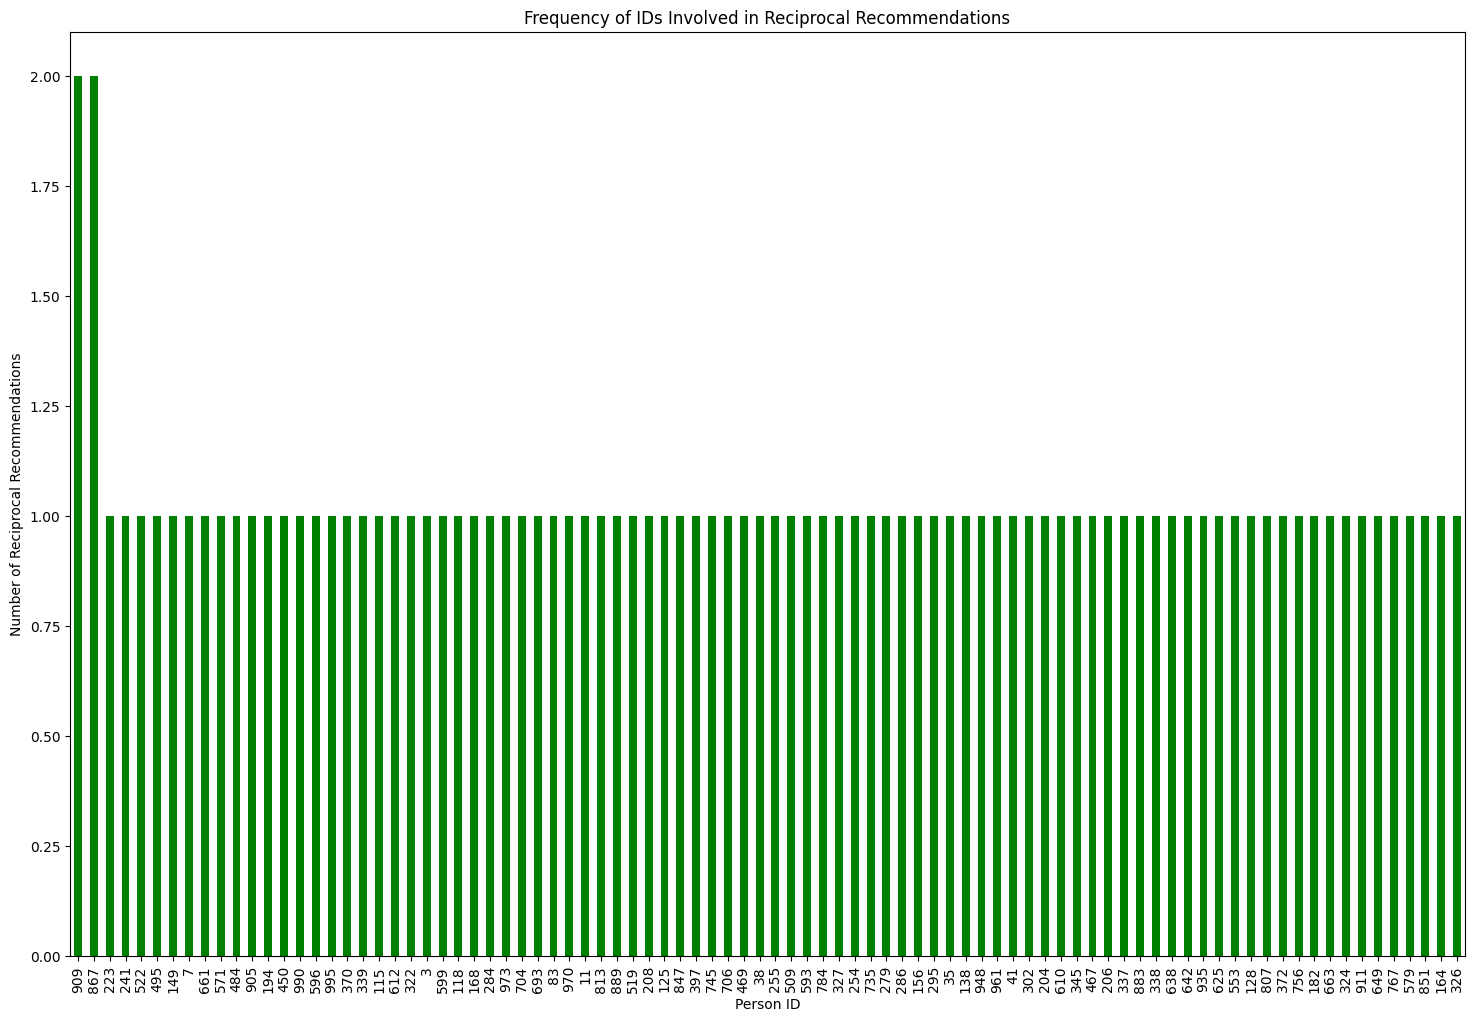

In [ ]:
import matplotlib.pyplot as plt

reciprocal_counts = pd.Series([id for pair in reciprocal_pairs for id in pair]).value_counts()

plt.figure(figsize=(18, 12))
reciprocal_counts.plot(kind='bar', color='green')
plt.xlabel('Person ID')
plt.ylabel('Number of Reciprocal Recommendations')
plt.title('Frequency of IDs Involved in Reciprocal Recommendations')
plt.show()
